<a href="https://colab.research.google.com/github/almostoutlier/Projects/blob/main/Custom_Resume_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
!pip install requests Pillow

In [ ]:
!pip install pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
import PIL.Image
from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
imagemodel = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True


def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)
    return u" ".join(t.strip() for t in visible_texts)

html = urllib.request.urlopen('https://geebo.com/jobs-online/view/id/859999990-digital-data-analyst-adobe-/?utm_campaign=google_jobs_apply&utm_source=google_jobs_apply&utm_medium=organic').read()
wp=text_from_html(html)

<ipython-input-9-7f585521fc93>:11: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  texts = soup.findAll(text=True)


In [ ]:
job_description = model.generate_content("pick job description from"+wp)
job_description.resolve()
job_description=job_description.text
print(job_description)

**Job Title:** Digital Data Analyst

**Company:** Walt Disney World MDX App

**Location:** Loughman, FL

**Salary:** $9.39 - $18.62 per hour (estimated)

**Job Summary:**

The Digital Analyst is responsible for supporting the Walt Disney World MDX App digital ecosystem. They will generate and implement technical requirements for analytics, develop and maintain regular reports, conduct both planned and ad hoc analyses, and perform deep dives to provide insights on performance to various audiences.

**Responsibilities:**

* Act as a MDX App digital analytics subject matter expert
* Collaborate with product, technology, and analytics partners to determine data needs and ensure implementation and collection of data
* Manage compilation and dissemination of regular reports on performance of the Walt Disney World MDX App channel
* Generate insights from site data and communicate opportunities or issues
* Work with implementation specialists to validate mobile app tracking
* Design effective 

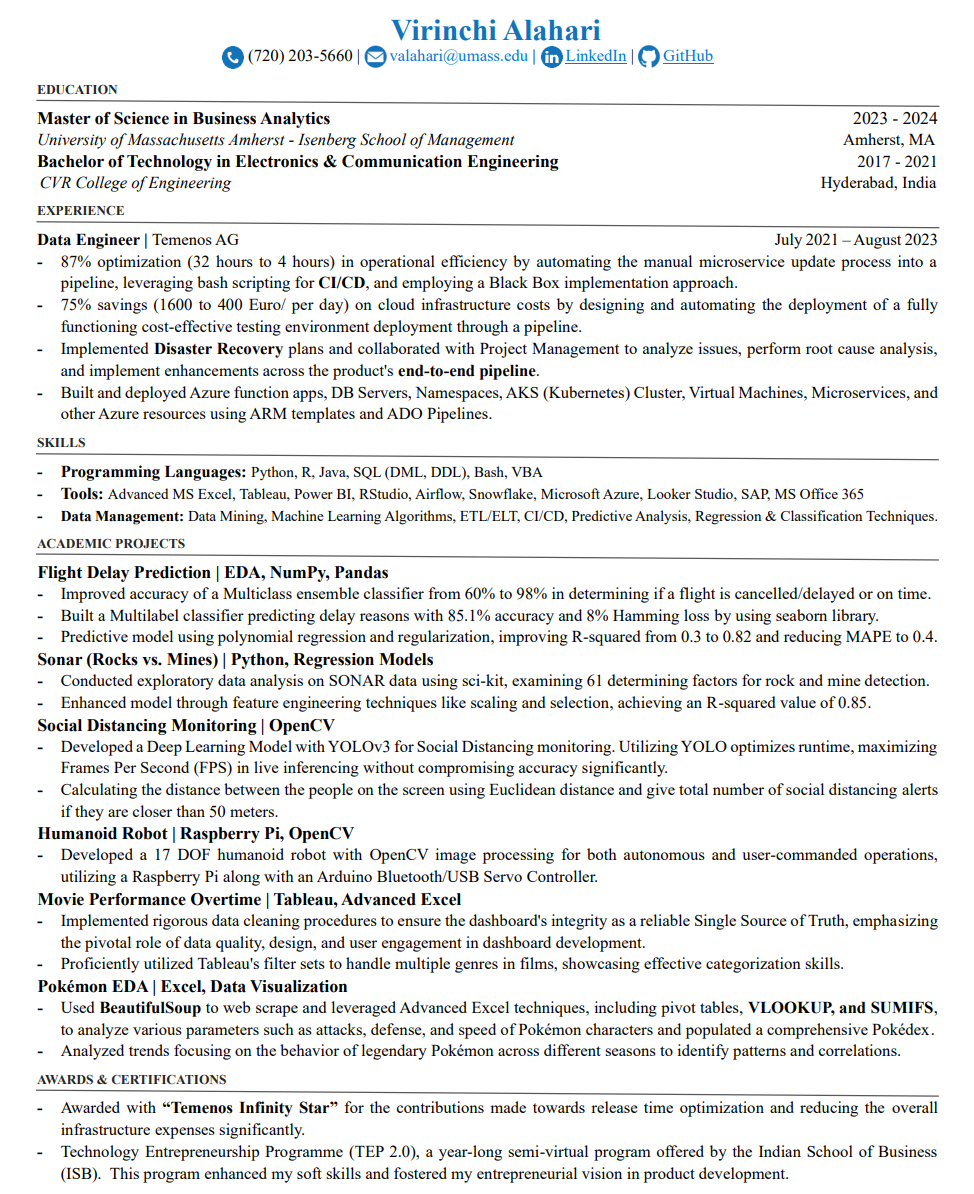

In [ ]:
img = PIL.Image.open('/content/drive/MyDrive/Screenshot (12).png')
img

In [ ]:
promt = "give me the summary in 40-50 words of the resume with the job description given below"+ job_description
print(promt)

give me the summary in 40-50 words of the resume with the job description given below**Job Title:** Digital Data Analyst

**Company:** Walt Disney World MDX App

**Location:** Loughman, FL

**Salary:** $9.39 - $18.62 per hour (estimated)

**Job Summary:**

The Digital Analyst is responsible for supporting the Walt Disney World MDX App digital ecosystem. They will generate and implement technical requirements for analytics, develop and maintain regular reports, conduct both planned and ad hoc analyses, and perform deep dives to provide insights on performance to various audiences.

**Responsibilities:**

* Act as a MDX App digital analytics subject matter expert
* Collaborate with product, technology, and analytics partners to determine data needs and ensure implementation and collection of data
* Manage compilation and dissemination of regular reports on performance of the Walt Disney World MDX App channel
* Generate insights from site data and communicate opportunities or issues
* Wor

In [ ]:
response = imagemodel.generate_content([promt, img], stream=True)
response.resolve()
summary = response.text
print(summary)

 Data Analyst with 3+ years of experience in web analytics, specializing in mobile app analytics. Proven ability to derive actionable insights from data, communicate effectively, and manage multiple projects simultaneously. Seeking a role where I can use my skills and experience to make a positive impact on a company's digital ecosystem.


In [ ]:
promt = "give me only top 20 technical skills from the job descriptions"+ job_description
response = imagemodel.generate_content([promt, img], stream=True)
response = model.generate_content("segerate the above skills into data skills, programming languages and tools and make sure that the skills are not repeated in those 3 sections")
skills=response.text
print(skills)

**Data Skills:**

* Data mining
* Data analysis
* Data visualization
* Data cleaning
* Statistical modeling
* Data management

**Programming Languages:**

* Python
* R
* Java
* SQL
* C++

**Tools:**

* Hadoop
* Spark
* Tableau
* Power BI
* Jupyter Notebook
* TensorFlow
* PyTorch


In [ ]:
dataskills = ['ETL/ELT', 'Azure']
prolang = ['Python', 'SQL', 'R']
tools = ['Excel', 'Tableau', 'Power BI']

preskills=['ETL/ELT', 'Azure', 'Python', 'SQL', 'R', 'Excel', 'Tableau', 'Power BI']

# Split the string into lines
proskills=skills.replace('\n','')
proskills=skills.replace('*','')
lines = proskills.split('\n')


current_section = None

for line in lines:
    line = line.strip()
    if line.endswith(':'):
        current_section = line[:-1]  # Remove the colon
    elif line:
        if current_section == 'Data Skills' and line not in preskills:
            dataskills.append(line)
        elif current_section == 'Programming Languages' and line not in preskills:
            prolang.append(line)
        elif current_section == 'Tools' and line not in preskills:
            tools.append(line)

dataskills_str = ', '.join(dataskills)
prolang_str = ', '.join(prolang)
tools_str = ', '.join(tools)

print("Data Skills:", dataskills_str)
print("Programming Languages:", prolang_str)
print("Tools:", tools_str)

Data Skills: ETL/ELT, Azure, Data mining, Data analysis, Data visualization, Data cleaning, Statistical modeling, Data management
Programming Languages: Python, SQL, R, Java, C++
Tools: Excel, Tableau, Power BI, Hadoop, Spark, Jupyter Notebook, TensorFlow, PyTorch


In [ ]:
from docx import Document
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.shared import Pt, Inches

def set_column_width(column, width):
    for cell in column.cells:
        cell.width = width
        for paragraph in cell.paragraphs:
            for run in paragraph.runs:
                run.font.size = Inches(0.12)  # Optional: Adjust font size if needed

def add_education(doc, degree, duration, school, location):
    table = doc.add_table(rows=1, cols=2)
    table.autofit = False  # Disable auto-fit so we can set column widths

    # Set column widths
    table.columns[0].width = Inches(6.0)
    table.columns[1].width = Inches(1.5)

    # Adjust cell width directly in the XML to enforce the width
    set_column_width(table.columns[0], Inches(6.0))
    set_column_width(table.columns[1], Inches(1.5))

    row = table.rows[0].cells
    cell = row[0].paragraphs[0]
    cell.add_run(degree).bold = True
    cell.add_run('\n' + school).italic = True

    cell = row[1].paragraphs[0]
    cell.alignment = WD_PARAGRAPH_ALIGNMENT.RIGHT
    cell.add_run(duration)
    cell.add_run('\n' + location)

    # Remove space before and after paragraphs in the table
    for paragraph in row[0].paragraphs + row[1].paragraphs:
        paragraph_format = paragraph.paragraph_format
        paragraph_format.space_before = Pt(0)
        paragraph_format.space_after = Pt(0)

def create_resume():
    # Create a new Document
    doc = Document()

    # Set document margins to be narrow
    sections = doc.sections
    for section in sections:
        section.top_margin = Inches(0.1)
        section.bottom_margin = Inches(0.4)
        section.left_margin = Inches(0.4)
        section.right_margin = Inches(0.4)

    # Add the name and contact information
    name = doc.add_heading('Virinchi Alahari', level=1)
    name.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    name.runs[0].font.size = Pt(16)

    contact_info = doc.add_paragraph()
    contact_info.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    contact_info_run = contact_info.add_run('720-203-5660 | valahari@umass.edu | LinkedIn | GitHub')
    contact_info_run.font.size = Pt(10)

    # Add a section for Summary
    summary_heading = doc.add_heading('SUMMARY', level=2)
    summary_heading_format = summary_heading.paragraph_format
    summary_heading_format.space_before = Pt(0)
    summary_heading_format.space_after = Pt(0)

    summarydoc = doc.add_paragraph(style='Normal')
    summarydoc.add_run(summary)

    # Add a section for Education
    education_heading = doc.add_heading('EDUCATION', level=2)
    education_heading_format = education_heading.paragraph_format
    education_heading_format.space_before = Pt(0)
    education_heading_format.space_after = Pt(0)

    add_education(doc, 'Master of Science in Business Analytics', '2023 - 2024', 'University of Massachusetts Amherst - Isenberg School of Management', 'Amherst, MA')
    add_education(doc, 'Bachelor of Technology in Electronics & Communication Engineering', '2017 - 2021', 'CVR College of Engineering', 'Hyderabad, India')

    # Add a section for Experience
    experience_heading = doc.add_heading('EXPERIENCE', level=2)
    experience_heading_format = experience_heading.paragraph_format
    experience_heading_format.space_before = Pt(0)
    experience_heading_format.space_after = Pt(0)

    doc.add_paragraph('Product Engineer | Temenos AG', style='Normal')
    doc.add_paragraph('July 2021 – August 2023', style='Normal')

    doc.add_paragraph('Optimized operational efficiency by 87% by automating manual microservice updates into a pipeline, reducing time from 32 hours to 4 hours per release.', style='List Bullet')
    doc.add_paragraph('Achieved 75% savings on cloud infrastructure costs by automating a cost-effective testing environment, reducing daily expenses from 1600 to 400 Euros and implemented Disaster Recovery plans', style='List Bullet')
    doc.add_paragraph('Deployed Azure function apps, DB servers, Namespaces, AKS Clusters, Virtual Machines, Microservices using ARM templates and ADO Pipelines.', style='List Bullet')

    for paragraph in doc.paragraphs:
        if paragraph.style.name == 'Normal':
            paragraph_format = paragraph.paragraph_format
            paragraph_format.space_before = Pt(0)
            paragraph_format.space_after = Pt(0)

    # Add a section for Skills
    skills_heading = doc.add_heading('SKILLS', level=2)
    skills_heading_format = skills_heading.paragraph_format
    skills_heading_format.space_before = Pt(0)
    skills_heading_format.space_after = Pt(0)

    doc.add_paragraph('Programming Languages: ' +prolang_str, style='Normal')
    doc.add_paragraph('Data Skills: '+dataskills_str, style='Normal')
    doc.add_paragraph('Tools: '+tools_str, style='Normal')

    for paragraph in doc.paragraphs:
        if paragraph.style.name == 'Normal':
            paragraph_format = paragraph.paragraph_format
            paragraph_format.space_before = Pt(0)
            paragraph_format.space_after = Pt(2)

    # Add a section for Academic Projects
    academic_projects_heading = doc.add_heading('ACADEMIC PROJECTS', level=2)
    academic_projects_heading_format = academic_projects_heading.paragraph_format
    academic_projects_heading_format.space_before = Pt(0)
    academic_projects_heading_format.space_after = Pt(0)

    doc.add_paragraph('Flight Delay Prediction | Python ML Models', style='Normal')
    doc.add_paragraph('Boosted multiclass ensemble model accuracy from 60% to 98% for predicting flight delays, cancellations, and on-time arrivals.', style='List Bullet')
    doc.add_paragraph('Performed predictive analysis using polynomial regression, increasing R-squared from 0.3 to 0.82 and reducing MAPE to 0.4.', style='List Bullet')

    doc.add_paragraph('Sonar (Rocks vs. Mines) | Python Regression Models', style='Normal')
    doc.add_paragraph('Analyzed SONAR data to identify determining factors for rock and mine detection.', style='List Bullet')
    doc.add_paragraph('Achieved R-squared value of 0.85 through feature engineering techniques.', style='List Bullet')

    doc.add_paragraph('Social Distancing Monitoring | Python OpenCV', style='Normal')
    doc.add_paragraph('Developed a Deep Learning Model with YOLOv3, TensorFlow, and OpenCV for social distancing monitoring.', style='List Bullet')
    doc.add_paragraph('Utilized YOLO to optimize runtime for live inferencing without compromising accuracy.', style='List Bullet')
    doc.add_paragraph('Monitored social distancing using Euclidean distance to count alerts for individuals closer than 50 meters.', style='List Bullet')

    for paragraph in doc.paragraphs:
        if paragraph.style.name == 'Normal':
            paragraph_format = paragraph.paragraph_format
            paragraph_format.space_before = Pt(0)
            paragraph_format.space_after = Pt(2)

    # Add a section for Awards
    awards_heading = doc.add_heading('AWARDS & CERTIFICATIONS', level=2)
    awards_heading_format = awards_heading.paragraph_format
    awards_heading_format.space_before = Pt(0)
    awards_heading_format.space_after = Pt(2)

    doc.add_paragraph('Awarded “Temenos Infinity Star” for contributions towards release time optimization and infrastructure cost savings.', style='List Bullet')
    doc.add_paragraph('Received Technology Entrepreneurship Programme 2.0 Certification from Indian School of Business', style='List Bullet')

    for paragraph in doc.paragraphs:
        if paragraph.style.name == 'Normal':
            paragraph_format = paragraph.paragraph_format
            paragraph_format.space_before = Pt(0)
            paragraph_format.space_after = Pt(2)

    # Save the document
    doc.save('ATS_Optimized_Resume.docx')

# Generate the ATS optimized resume
create_resume()
